## KNN OPTIMIZED CODE WITH BALANCING WITH SMOTE & NORMALIZATION


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



loo = LeaveOneOut()
loo_scores = [] 

## Splitting & Using KNN

In [5]:

knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X, y)

cv = LeaveOneOut()
y_pred = cross_val_predict(knn, X, y, cv=cv)


## Using Evaluation Metrics

Leave-One-Out CV Accuracy: 90.12229539040452 %
Precision (macro) = 0.9098443995638101
Recall (macro) = 0.8210031662314164
F1-score (macro) = 0.8596076334606093


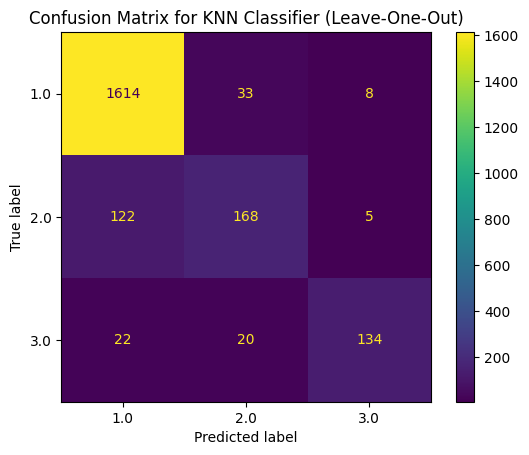

Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96      1655
         2.0       0.86      0.66      0.75       295
         3.0       0.93      0.81      0.87       176

    accuracy                           0.93      2126
   macro avg       0.91      0.82      0.86      2126
weighted avg       0.92      0.93      0.92      2126



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, auc

from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy = accuracy_score(y, y_pred)
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

precision = precision_score(y, knn.predict(X), average='macro')
recall = recall_score(y, knn.predict(X), average='macro')
f1 = f1_score(y, knn.predict(X), average='macro')
print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

conf_matrix = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier (Leave-One-Out)')
plt.show()
class_report = classification_report(y, knn.predict(X))
print("Classification Report:")
print(class_report)



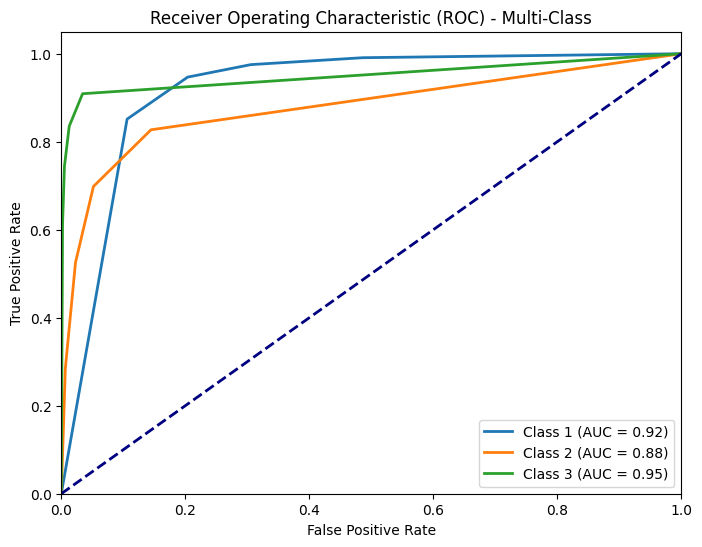

In [7]:

knn = KNeighborsClassifier(n_neighbors=4)
cv = LeaveOneOut()

y_true = []
y_probs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn.fit(X_train, y_train)

    y_prob = knn.predict_proba(X_test)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    y_true.extend(y_test_binarized)
    y_probs.extend(y_prob)

y_true = np.array(y_true)
y_probs = np.array(y_probs)

n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

class_labels = [1, 2, 3] 

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.show()


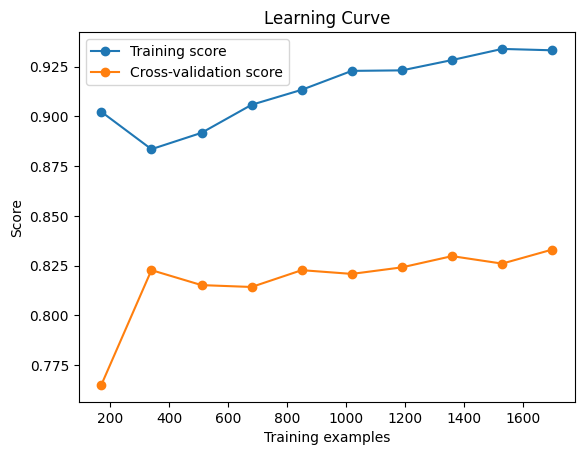

In [8]:
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Original Accuracy: 0.8802816901408451


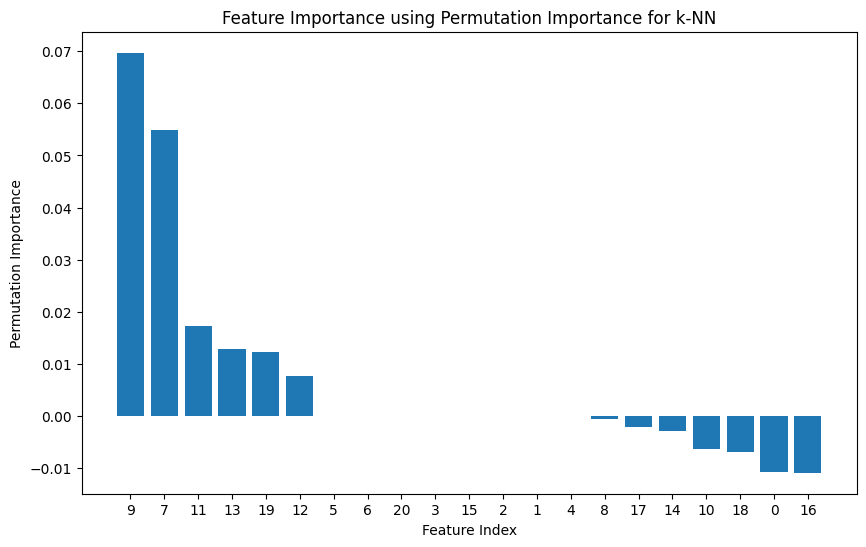

Top Feature Indices:
Feature Index 9
Feature Index 7
Feature Index 11
Feature Index 13
Feature Index 19
Feature Index 12


In [9]:
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

original_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=30, random_state=42)

feature_importance_scores = perm_importance.importances_mean
feature_indices = np.argsort(feature_importance_scores)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance_scores[feature_indices], tick_label=feature_indices)
plt.xlabel('Feature Index')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance for k-NN')
plt.show()

print("Top Feature Indices:")
for idx in feature_indices[:6]: 
    print(f"Feature Index {idx}")


In [10]:

top_k_features_indices = feature_indices[:7]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X[:, top_k_features_indices]


print("Adjusted X based on Important Features:")
print(X_selected)


Indices of Important Features: [ 9  7 11 13 19 12  5]
Adjusted X based on Important Features:
[[ 43.  73.  64. ...  73.  62.   0.]
 [  0.  17. 130. ...  12.  68.   0.]
 [  0.  16. 130. ...  13.  68.   0.]
 ...
 [ 20.  79.  67. ...   4. 103.   0.]
 [ 27.  78.  66. ...   4. 103.   0.]
 [ 36.  74.  42. ...   1. 117.   0.]]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


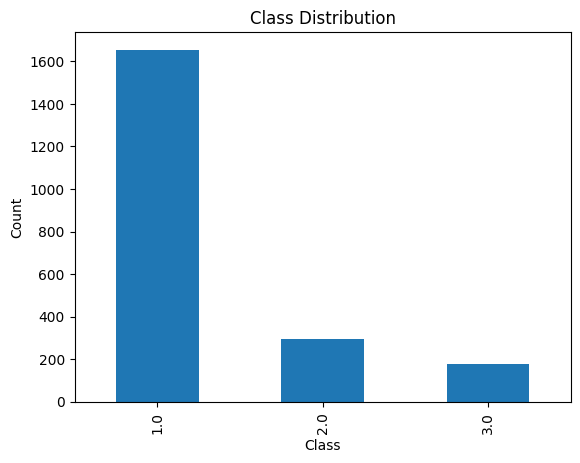

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_selected)
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_normalized, y)

# y_resampled_int = y_resampled.astype(int)



Class Distribution:
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


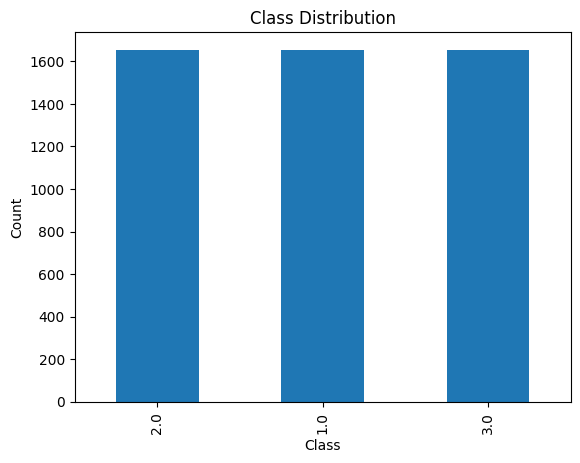

In [13]:
y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()
mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using KNN

In [14]:
# knn_after_smote = KNeighborsClassifier(n_neighbors=4)
# knn_after_smote.fit(X_resampled, y_resampled)

from sklearn.model_selection import cross_val_predict, StratifiedKFold

# y_pred_res = knn_after_smote.predict(X_test)
knn_after_resample = KNeighborsClassifier(n_neighbors=4) 
knn_after_resample.fit(X_resampled, y_resampled)

cv = LeaveOneOut()
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_res = cross_val_predict(knn_after_resample, X_resampled, y_resampled, cv=cv)




Holdout CV : 0.8558823529411765
Leave-OO CV : 0.8687676387582314
k-Fold CV : 0.8701795095082339
Stratified kF CV: 0.8650067966526486


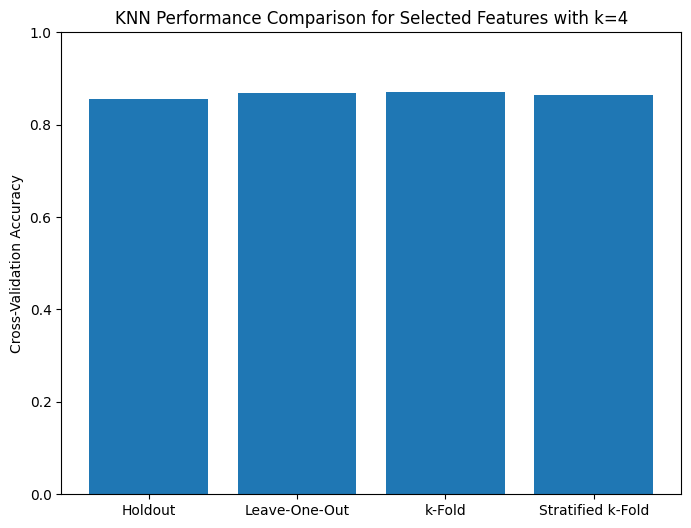

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, LeaveOneOut, StratifiedKFold, KFold
from sklearn.neighbors import KNeighborsClassifier

# Fixed value for k
k = 4

cv_scores_holdout = []
cv_scores_leave_one_out = []
cv_scores_kfold = []
cv_scores_stratified_kfold = []

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
cv_scores_holdout.append(scores.mean())
print(f'Holdout CV : {scores.mean()}')

loo = LeaveOneOut()
knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X_selected, y, cv=loo, scoring='accuracy')
cv_scores_leave_one_out.append(scores.mean())
print(f'Leave-OO CV : {scores.mean()}')

kf = KFold(n_splits=4, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X_selected, y, cv=kf, scoring='accuracy')
cv_scores_kfold.append(scores.mean())
print(f'k-Fold CV : {scores.mean()}')

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(knn, X_selected, y, cv=skf, scoring='accuracy')
cv_scores_stratified_kfold.append(scores.mean())
print(f'Stratified kF CV: {scores.mean()}')

plt.figure(figsize=(8, 6))
plt.bar(['Holdout', 'Leave-One-Out', 'k-Fold', 'Stratified k-Fold'],
        [cv_scores_holdout[0], cv_scores_leave_one_out[0], cv_scores_kfold[0], cv_scores_stratified_kfold[0]])
plt.title(f'KNN Performance Comparison for Selected Features with k={k}')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

Accuracy: 94.48136958710977 %
Precision (macro) = 0.9709382779037116
Recall (macro) = 0.9705941591137967
F1-score (macro) = 0.9705483802706046


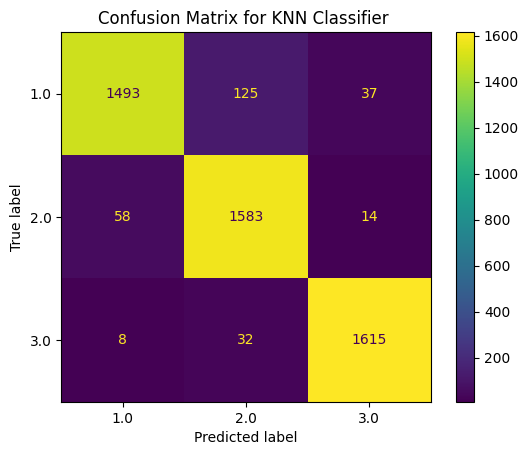

Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      0.94      0.96      1655
         2.0       0.95      0.98      0.97      1655
         3.0       0.98      0.99      0.98      1655

    accuracy                           0.97      4965
   macro avg       0.97      0.97      0.97      4965
weighted avg       0.97      0.97      0.97      4965



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy = accuracy_score(y_resampled, y_pred_res)
print("Accuracy:", accuracy * 100, "%")

precision = precision_score(y_resampled, knn_after_resample.predict(X_resampled), average='macro')
recall = recall_score(y_resampled, knn_after_resample.predict(X_resampled), average='macro')
f1 = f1_score(y_resampled, knn_after_resample.predict(X_resampled), average='macro')
print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

conf_matrix = confusion_matrix(y_resampled, y_pred_res)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier ')
plt.show()
class_report = classification_report(y_resampled, knn_after_resample.predict(X_resampled))
print("Classification Report:")
print(class_report)



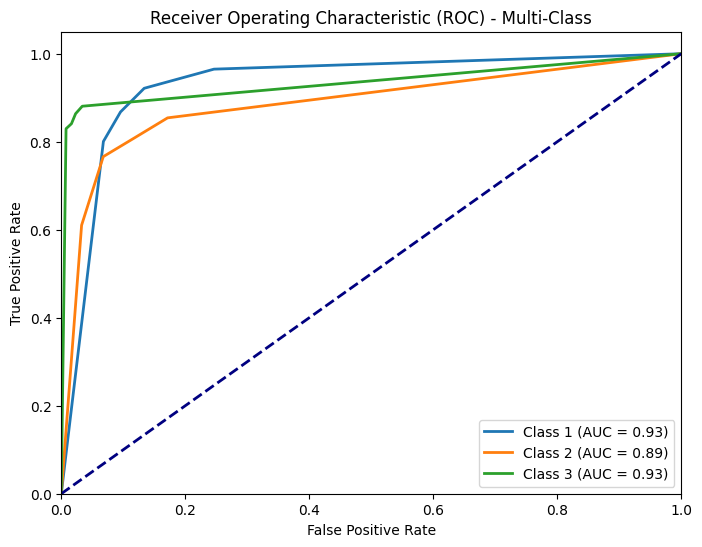

In [17]:

knn = KNeighborsClassifier(n_neighbors=4)
cv = LeaveOneOut()

y_true = []
y_probs = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    knn.fit(X_train_resampled, y_train_resampled)

    y_prob = knn.predict_proba(X_test)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))

    y_true.extend(y_test_binarized)
    y_probs.extend(y_prob)

y_true = np.array(y_true)
y_probs = np.array(y_probs)

n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

class_labels = [1, 2, 3]  

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class')
plt.legend(loc="lower right")
plt.show()


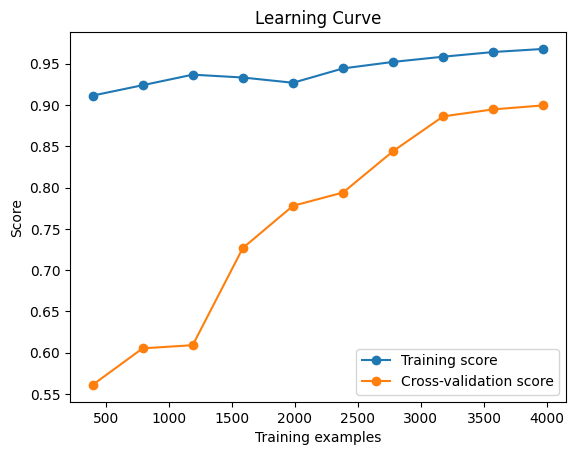

In [18]:
train_sizes, train_scores, test_scores = learning_curve(knn_after_resample, X_resampled, y_resampled, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()